In [2]:
# !pip install matplotlib
# !pip install seaborn
# !pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregar os dados do Excel
df = pd.read_excel("C:/Users/junio/OneDrive/Documentos/GitHub Repositórios/dio-bootcamp-microsoft-AI_for_Tech/projeto_relatorio_vendas/data/processed_data/Meganium_Sales_data.xlsx", sheet_name="Meganium_Sales_Data_Consolidate")

# Converter a coluna 'date_sold' para o tipo datetime
df['date_sold'] = pd.to_datetime(df['date_sold'])

In [5]:
# Definir taxas de câmbio
gbp_to_usd = 1.25
eur_to_usd = 1.10

# Converter preços para USD
def convert_to_usd(row):
    if row['currency'] == 'GBP':
        return row['total_price'] * gbp_to_usd
    elif row['currency'] == 'EUR':
        return row['total_price'] * eur_to_usd
    else:
        return row['total_price']

df['total_price_usd'] = df.apply(convert_to_usd, axis=1)

# Converter descontos para USD
def convert_discount_to_usd(row):
    if row['currency'] == 'GBP':
        return row['discount_value'] * gbp_to_usd
    elif row['currency'] == 'EUR':
        return row['discount_value'] * eur_to_usd
    else:
        return row['discount_value']

df['discount_value_usd'] = df.apply(convert_discount_to_usd, axis=1)

C:\Users\junio\AppData\Local\Temp\ipykernel_18020\1830072266.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_sold', y='volume', data=product_sales, palette='viridis')


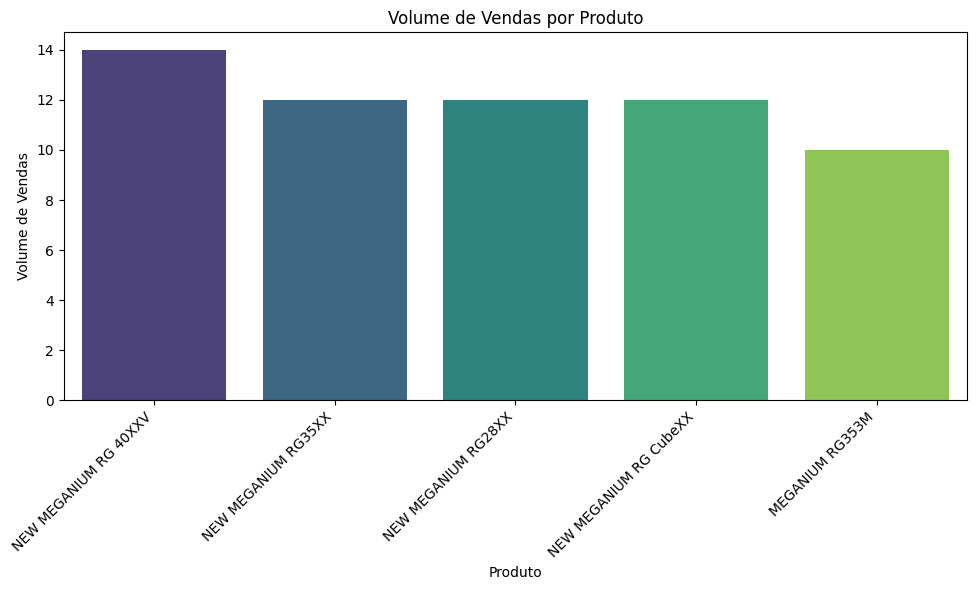


Resumo: O gráfico de barras acima demonstra o volume de vendas por produto. Observamos que o 'NEW MEGANIUM RG 40XXV' é o produto mais vendido, seguido de perto pelo 'NEW MEGANIUM RG CubeXX' e 'NEW MEGANIUM RG35XX'. O 'MEGANIUM RG353M' apresenta o menor volume de vendas. Esses dados são cruciais para decisões de estoque e marketing.


In [6]:
# 1. Volume de Vendas por Produto
product_sales = df['product_sold'].value_counts().reset_index()
product_sales.columns = ['product_sold', 'volume']

plt.figure(figsize=(10, 6))
sns.barplot(x='product_sold', y='volume', data=product_sales, palette='viridis')
plt.title('Volume de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nResumo: O gráfico de barras acima demonstra o volume de vendas por produto. Observamos que o 'NEW MEGANIUM RG 40XXV' é o produto mais vendido, seguido de perto pelo 'NEW MEGANIUM RG CubeXX' e 'NEW MEGANIUM RG35XX'. O 'MEGANIUM RG353M' apresenta o menor volume de vendas. Esses dados são cruciais para decisões de estoque e marketing.")


C:\Users\junio\AppData\Local\Temp\ipykernel_18020\3067756168.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_sold', y='total_price_usd', data=product_revenue, palette='magma')


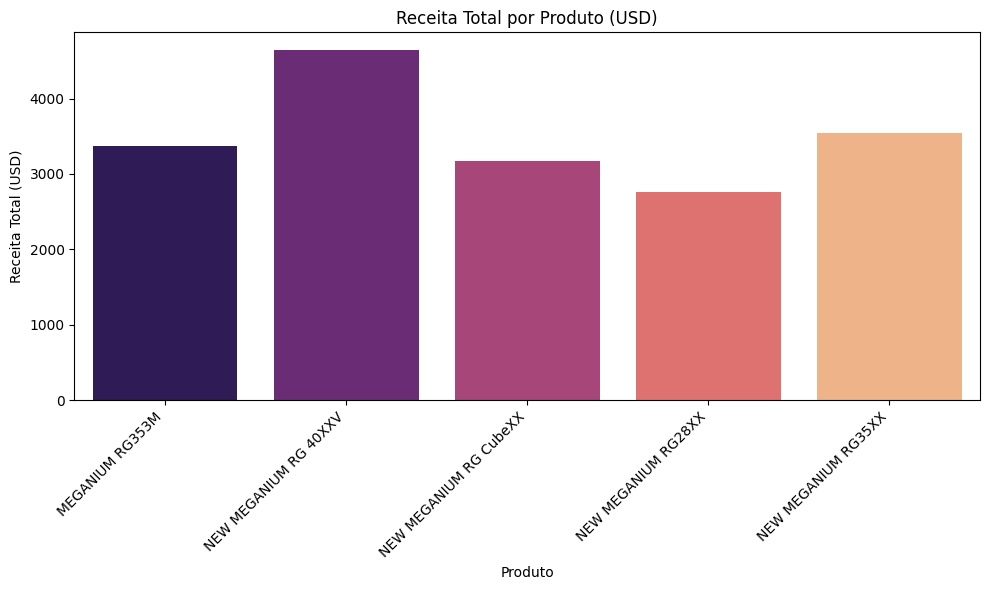


Resumo: O gráfico de barras acima ilustra a receita total gerada por cada produto, convertida para Dólar Americano (USD). O 'NEW MEGANIUM RG 40XXV' se destaca como o principal gerador de receita, refletindo seu preço unitário mais alto e volume de vendas significativo. Esses insights são fundamentais para avaliar o desempenho financeiro dos produtos.


In [7]:
# 2. Receita Total por Produto (em USD)
product_revenue = df.groupby('product_sold')['total_price_usd'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='product_sold', y='total_price_usd', data=product_revenue, palette='magma')
plt.title('Receita Total por Produto (USD)')
plt.xlabel('Produto')
plt.ylabel('Receita Total (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nResumo: O gráfico de barras acima ilustra a receita total gerada por cada produto, convertida para Dólar Americano (USD). O 'NEW MEGANIUM RG 40XXV' se destaca como o principal gerador de receita, refletindo seu preço unitário mais alto e volume de vendas significativo. Esses insights são fundamentais para avaliar o desempenho financeiro dos produtos.")


C:\Users\junio\AppData\Local\Temp\ipykernel_18020\2217350190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='site', y='volume', data=platform_sales, palette='crest')


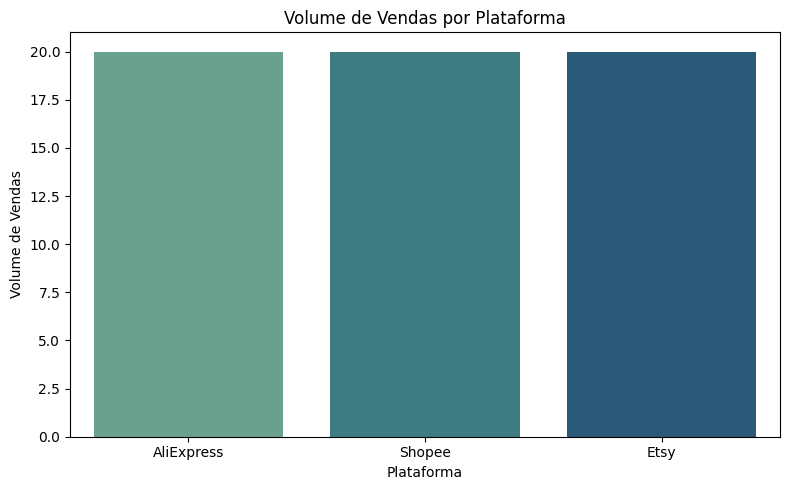


Resumo: O gráfico de barras acima mostra o volume de vendas por plataforma. A Shopee lidera como a principal plataforma de vendas, seguida por Etsy e AliExpress. Esses dados ajudam a identificar os canais de venda mais eficazes e a alocar recursos de marketing de forma estratégica.


In [8]:
# 3. Análise de Vendas por Plataforma
platform_sales = df['site'].value_counts().reset_index()
platform_sales.columns = ['site', 'volume']

plt.figure(figsize=(8, 5))
sns.barplot(x='site', y='volume', data=platform_sales, palette='crest')
plt.title('Volume de Vendas por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Volume de Vendas')
plt.tight_layout()
plt.show()

print("\nResumo: O gráfico de barras acima mostra o volume de vendas por plataforma. A Shopee lidera como a principal plataforma de vendas, seguida por Etsy e AliExpress. Esses dados ajudam a identificar os canais de venda mais eficazes e a alocar recursos de marketing de forma estratégica.")


C:\Users\junio\AppData\Local\Temp\ipykernel_18020\3756242888.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_country', y='volume', data=country_sales, palette='viridis')


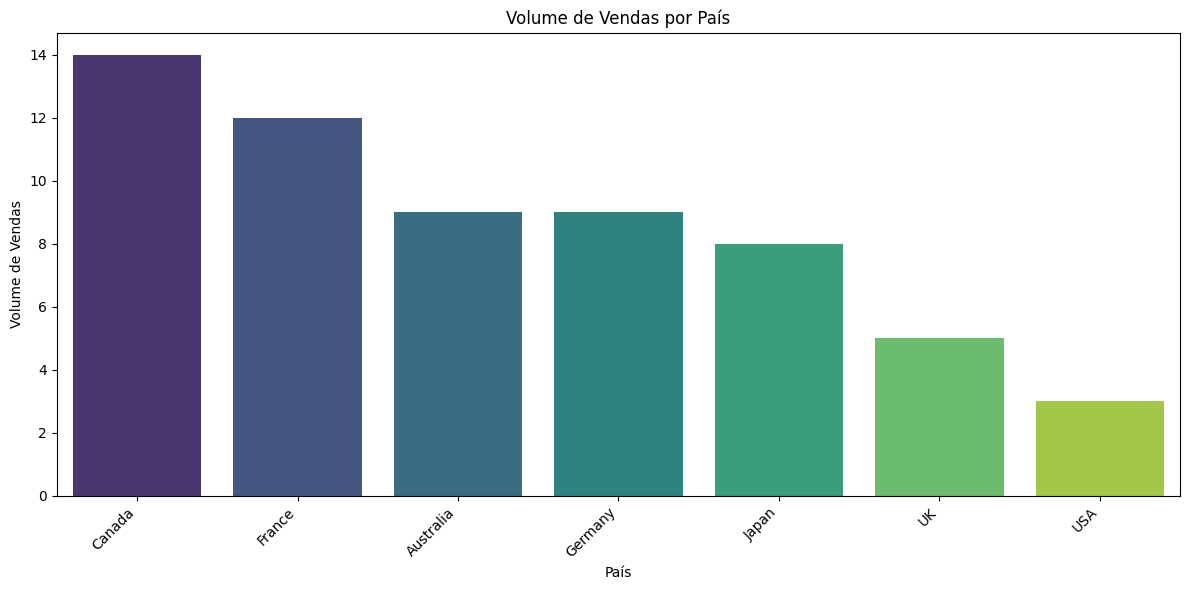


Resumo: O gráfico de barras acima demonstra o volume de vendas por país de entrega. Canadá e França se destacam como os principais mercados, seguidos por Austrália, Alemanha e Japão. Essa análise geográfica é crucial para adaptar estratégias de marketing e distribuição a diferentes mercados.


In [9]:
# 4. Análise Geográfica das Vendas
country_sales = df['delivery_country'].value_counts().reset_index()
country_sales.columns = ['delivery_country', 'volume']

plt.figure(figsize=(12, 6))
sns.barplot(x='delivery_country', y='volume', data=country_sales, palette='viridis')
plt.title('Volume de Vendas por País')
plt.xlabel('País')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nResumo: O gráfico de barras acima demonstra o volume de vendas por país de entrega. Canadá e França se destacam como os principais mercados, seguidos por Austrália, Alemanha e Japão. Essa análise geográfica é crucial para adaptar estratégias de marketing e distribuição a diferentes mercados.")


C:\Users\junio\AppData\Local\Temp\ipykernel_18020\2010768979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_sold', y='discount_value_usd', data=avg_discount_per_product, palette='coolwarm')


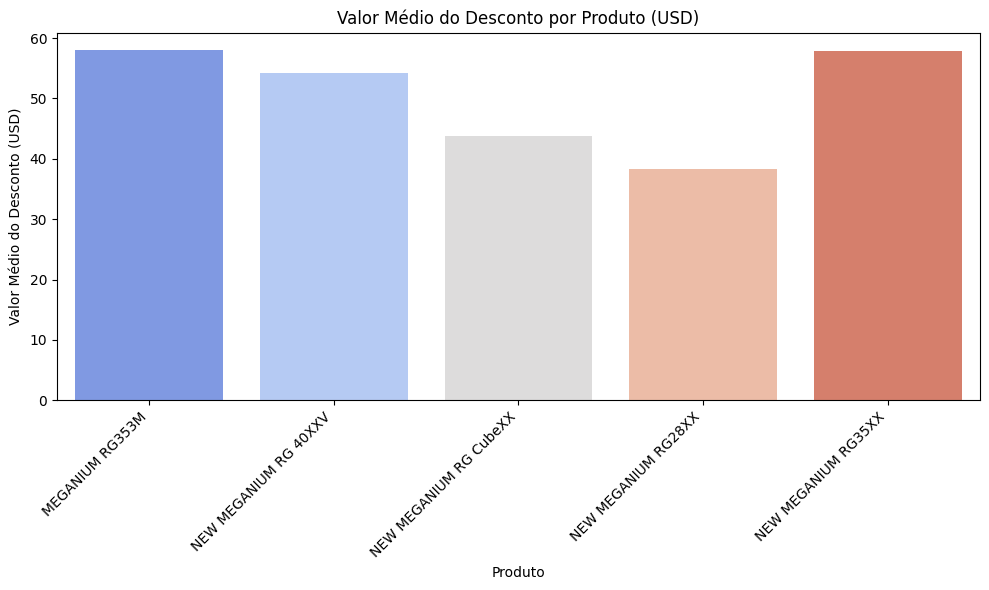


Resumo: O gráfico de barras acima mostra o valor médio do desconto por produto em USD. Observamos que o 'NEW MEGANIUM RG35XX' e o 'MEGANIUM RG353M' têm os maiores valores médios de desconto, enquanto o 'NEW MEGANIUM RG28XX' tem o menor. Essa análise auxilia na avaliação da eficácia das estratégias de desconto e no ajuste das políticas de preços.


In [10]:
# 5. Impacto dos Cupons de Desconto
# Calcular a média do valor do desconto por produto em USD
avg_discount_per_product = df.groupby('product_sold')['discount_value_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='product_sold', y='discount_value_usd', data=avg_discount_per_product, palette='coolwarm')
plt.title('Valor Médio do Desconto por Produto (USD)')
plt.xlabel('Produto')
plt.ylabel('Valor Médio do Desconto (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nResumo: O gráfico de barras acima mostra o valor médio do desconto por produto em USD. Observamos que o 'NEW MEGANIUM RG35XX' e o 'MEGANIUM RG353M' têm os maiores valores médios de desconto, enquanto o 'NEW MEGANIUM RG28XX' tem o menor. Essa análise auxilia na avaliação da eficácia das estratégias de desconto e no ajuste das políticas de preços.")


C:\Users\junio\AppData\Local\Temp\ipykernel_18020\2506530484.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='birth_decade', y='number_of_buyers', data=buyers_by_decade, palette='pastel')


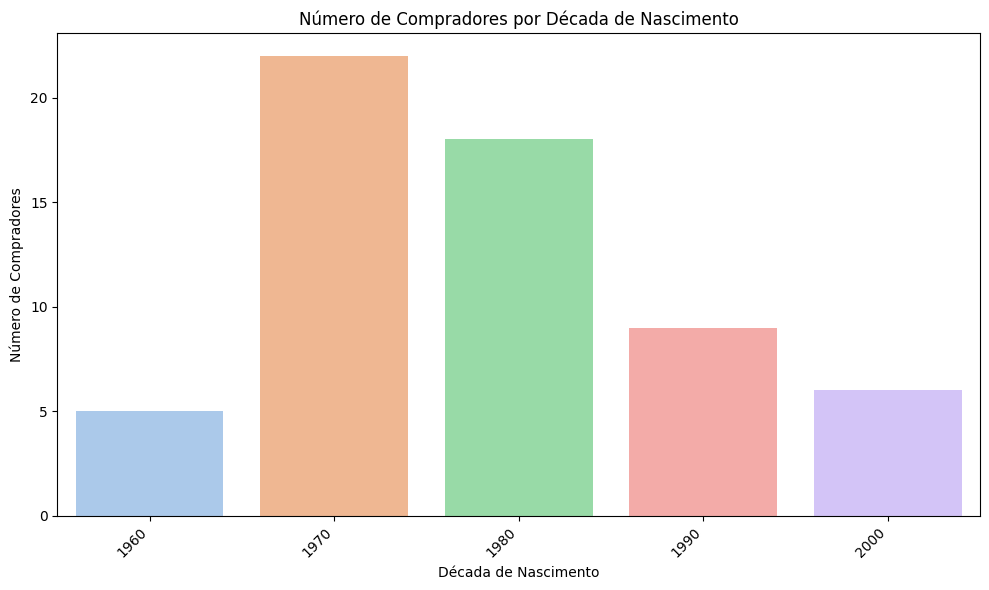


Resumo: O gráfico de barras acima apresenta o número de compradores por década de nascimento. Observa-se que a maioria dos compradores nasceu nas décadas de 1970 e 1980. Essa análise demográfica é valiosa para personalizar as estratégias de marketing e comunicação.


In [11]:
# 6. Perfil Demográfico dos Compradores
# Converter 'buyer_birth_date' para datetime e extrair a década de nascimento
df['buyer_birth_date'] = pd.to_datetime(df['buyer_birth_date'], errors='coerce')
df['birth_decade'] = (df['buyer_birth_date'].dt.year // 10) * 10

# Contar o número de compradores por década de nascimento
buyers_by_decade = df['birth_decade'].value_counts().sort_index().reset_index()
buyers_by_decade.columns = ['birth_decade', 'number_of_buyers']

plt.figure(figsize=(10, 6))
sns.barplot(x='birth_decade', y='number_of_buyers', data=buyers_by_decade, palette='pastel')
plt.title('Número de Compradores por Década de Nascimento')
plt.xlabel('Década de Nascimento')
plt.ylabel('Número de Compradores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nResumo: O gráfico de barras acima apresenta o número de compradores por década de nascimento. Observa-se que a maioria dos compradores nasceu nas décadas de 1970 e 1980. Essa análise demográfica é valiosa para personalizar as estratégias de marketing e comunicação.")


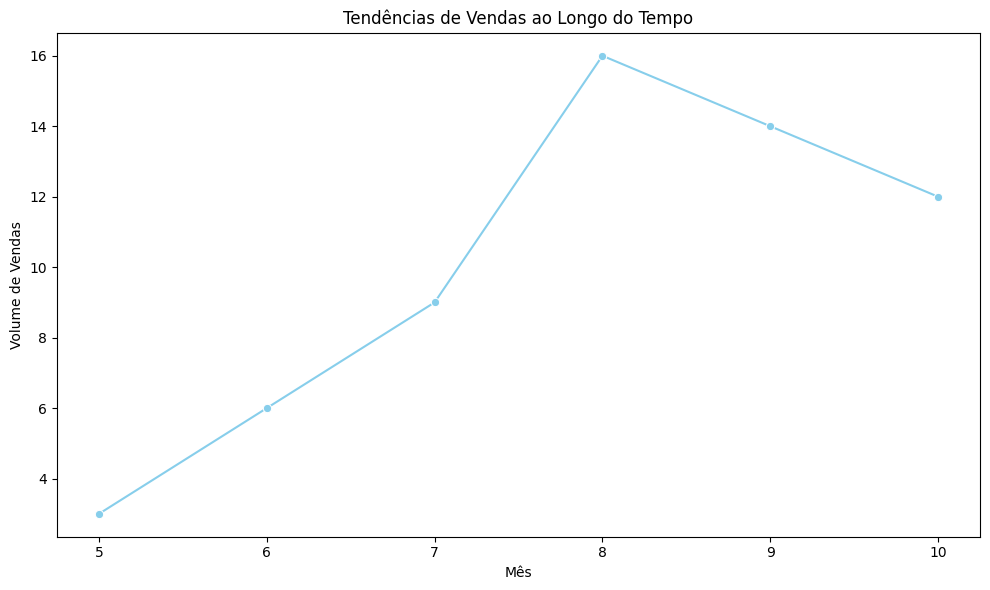


Resumo: O gráfico de linhas acima mostra as tendências de vendas ao longo do tempo, por mês. Observamos que as vendas tendem a aumentar em Setembro e Outubro. Essa análise de tendências sazonais é crucial para o planejamento de estoque e promoções.


In [12]:
# 7. Tendências de Vendas ao Longo do Tempo
# Extrair o mês da coluna 'date_sold'
df['date_month'] = df['date_sold'].dt.month

# Contar o número de vendas por mês
monthly_sales = df['date_month'].value_counts().sort_index().reset_index()
monthly_sales.columns = ['date_month', 'volume']

plt.figure(figsize=(10, 6))
sns.lineplot(x='date_month', y='volume', data=monthly_sales, marker='o', color='skyblue')
plt.title('Tendências de Vendas ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Volume de Vendas')
plt.xticks(monthly_sales['date_month'])
plt.tight_layout()
plt.show()

print("\nResumo: O gráfico de linhas acima mostra as tendências de vendas ao longo do tempo, por mês. Observamos que as vendas tendem a aumentar em Setembro e Outubro. Essa análise de tendências sazonais é crucial para o planejamento de estoque e promoções.")


In [13]:
# Exibir as taxas de câmbio utilizadas
print("\nTaxas de Câmbio Utilizadas:")
print(f"1 GBP (Libra Esterlina) = {gbp_to_usd} USD")
print(f"1 EUR (Euro) = {eur_to_usd} USD")



Taxas de Câmbio Utilizadas:
1 GBP (Libra Esterlina) = 1.25 USD
1 EUR (Euro) = 1.1 USD


---
### Este script realiza as seguintes tarefas:

- Carrega os dados: Lê o arquivo Excel.

- Converte moedas: Converte os valores para USD usando as taxas de câmbio fornecidas.

- Analisa o volume de vendas por produto: Calcula e exibe um gráfico de barras.

- Analisa a receita total por produto: Calcula e exibe um gráfico de barras.

- Analisa as vendas por plataforma: Calcula e exibe um gráfico de barras.

- Analisa a distribuição geográfica das vendas: Calcula e exibe um gráfico de barras.

- Analisa o impacto dos cupons de desconto: Calcula e exibe um gráfico de barras do valor médio do desconto por produto.

- Analisa o perfil demográfico dos compradores: Calcula e exibe um gráfico de barras do número de compradores por década de nascimento.

- Analisa as tendências de vendas ao longo do tempo: Calcula e exibe um gráfico de linhas do volume de vendas por mês.

- Imprime as taxas de câmbio utilizadas.